In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('C:/Users/Administrator/Desktop/Project_1/HDHI Admission data.csv')

In [13]:
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

1) Total Number of Admissions

In [14]:
total_admissions = len(df)
print(f"Total number of admissions: {total_admissions}")

Total number of admissions: 15757


2) Distribution of gender among admitted patients

GENDER
M    9990
F    5767
Name: count, dtype: int64


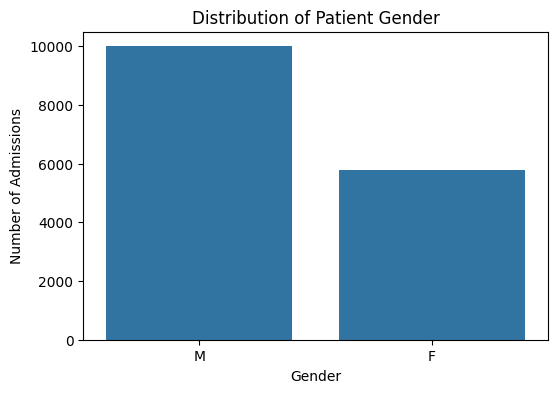

In [25]:
tot_gender = df['GENDER'].value_counts()
print(tot_gender)

plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=df)
plt.title('Distribution of Patient Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Admissions')
plt.show()


3. Age group most frequently admitted

age_group
0-20       56
21-40     520
41-60    5681
61-80    8122
81+      1376
Name: count, dtype: int64


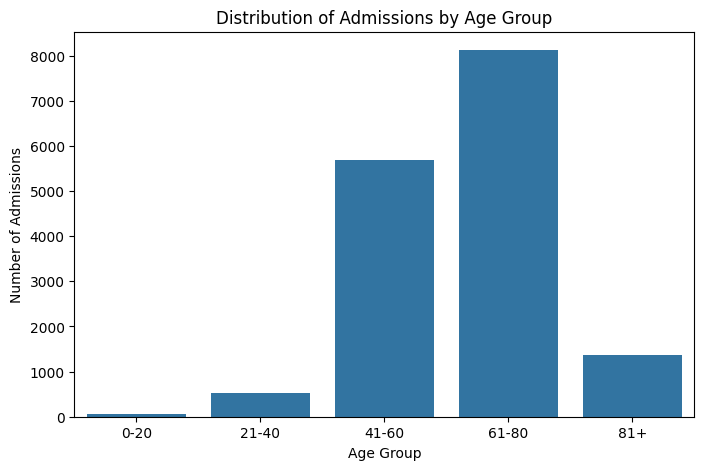

In [32]:
age_bins = [0, 18, 35, 60, 80, 100] 
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

age_group_distribution = df['age_group'].value_counts().sort_index()
print(age_group_distribution)

plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', data=df, order=age_labels)
plt.title('Distribution of Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Admissions')
plt.show()

4. Most common admission types

TYPE OF ADMISSION-EMERGENCY/OPD
E    10924
O     4833
Name: count, dtype: int64


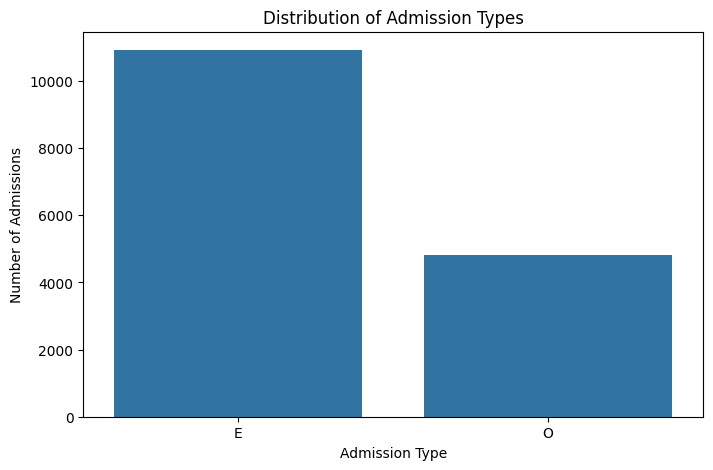

In [38]:
admission_type_distribution = df['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts()
print(admission_type_distribution)

plt.figure(figsize=(8, 5))
sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD', data=df)
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.show()

5. Which departments have the highest number of admissions?
6. What room type is most frequently assigned?

In [69]:
# No columns

7. Which day of the week do most patients get admitted

admission_day_name
Monday       1614
Tuesday      1556
Thursday     1441
Friday       1439
Saturday     1393
Wednesday    1373
Sunday       1286
Name: count, dtype: int64


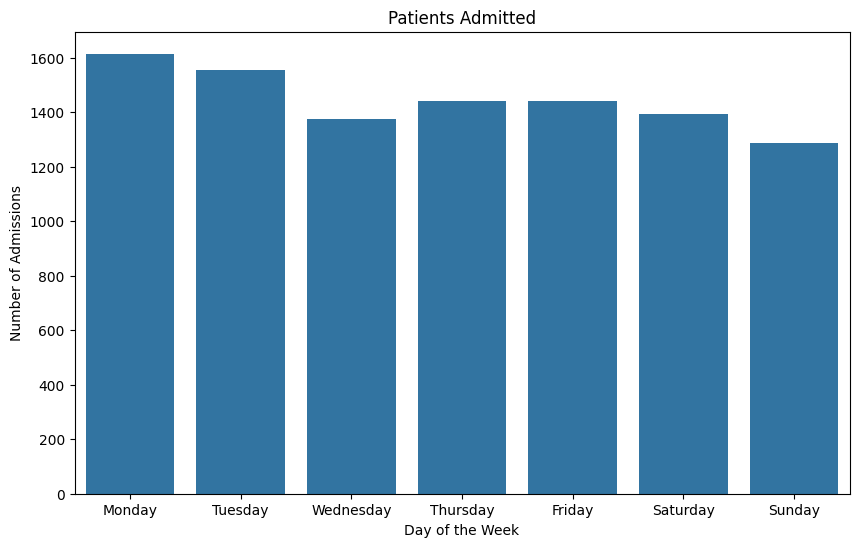

In [50]:
df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')
df['admission_day_name'] = df['D.O.A'].dt.day_name()

admission_day_distribution = df['admission_day_name'].value_counts()
print(admission_day_distribution)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))

sns.countplot(x='admission_day_name', data=df, order=day_order)
plt.title('Patients Admitted')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Admissions')
plt.show()

8. What percentage of patients have visited before (previous_visits > 0)?

In [64]:
# No column

9. Difference in admission types across genders

TYPE OF ADMISSION-EMERGENCY/OPD     E     O
GENDER                                     
F                                4055  1712
M                                6869  3121


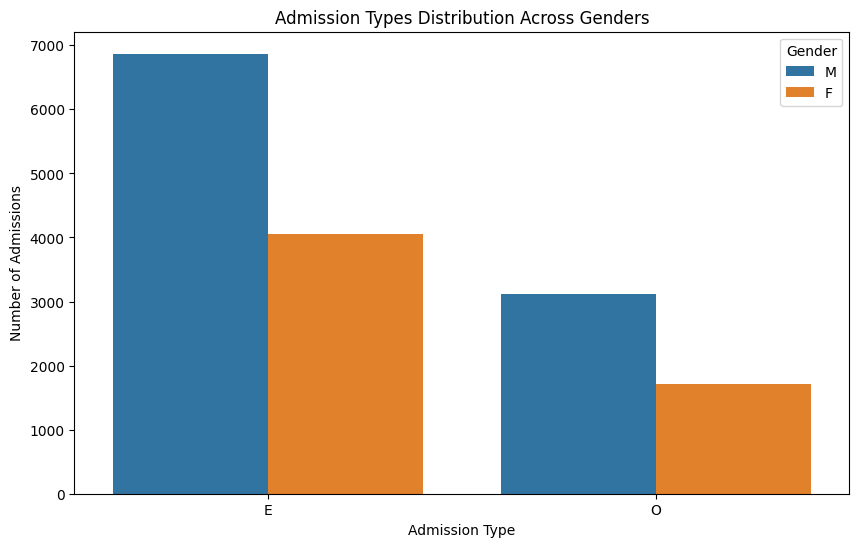

In [63]:
admission_type_by_gender = pd.crosstab(df['GENDER'], df['TYPE OF ADMISSION-EMERGENCY/OPD'])
print(admission_type_by_gender)

plt.figure(figsize=(10, 6))
sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD', hue='GENDER', data=df)
plt.title('Admission Types Distribution Across Genders')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.legend(title='Gender')
plt.show()

10. Visualizations representing interesting patterns in the data

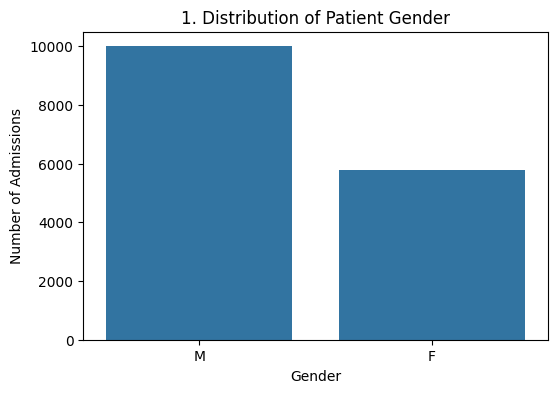

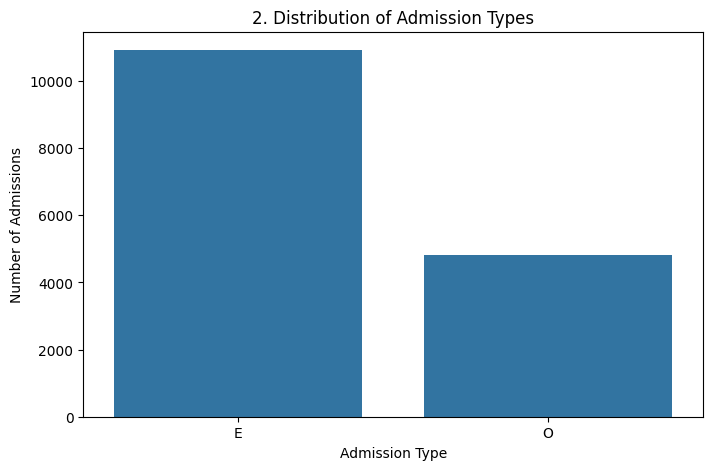

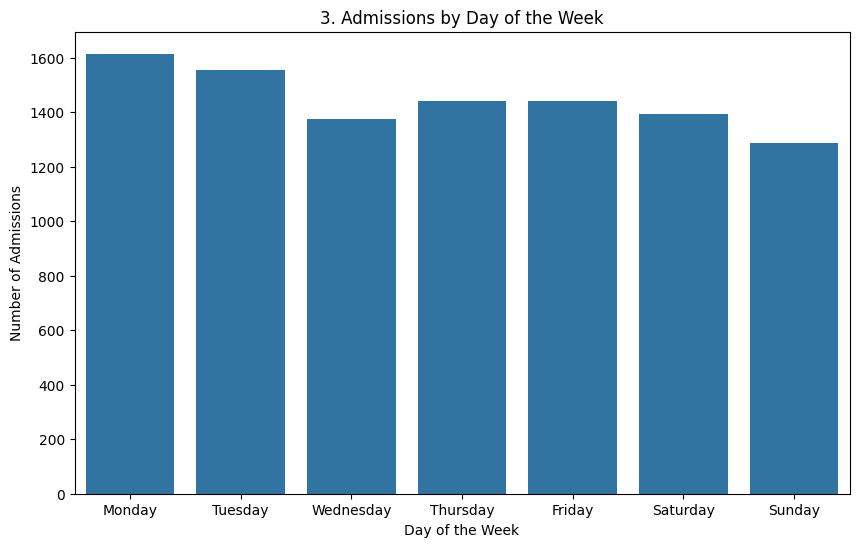

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=df)
plt.title('1. Distribution of Patient Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Admissions')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD', data=df)
plt.title('2. Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.show()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_day_name', data=df, order=day_order)
plt.title('3. Admissions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Admissions')
plt.show()

Insights:

1. Distribution of Patient Gender

    There are approximately 10,000 male admissions compared to about 5,800 female admissions. This suggests that the hospital receives a notably higher volume of male patients compared to female patients. 

2. Distribution of Admission Types

    The visualization indicates that 'E' (likely Emergency) is the most frequent admission type, with over 11,000 admissions. 'O' (likely OPD - Out-Patient Department or similar) admissions are considerably lower. The hospital experiences a much higher influx of emergency-related admissions compared to other types. 

3. Admissions by Day of the Week

    Admissions generally trend downwards towards the weekend, with Sunday having the lowest number of admissions (around 1300) and Monday having the highest (around 1600). This pattern suggests that the hospital is busiest at the beginning of the week, especially on Mondays and Tuesdays. 